### Plot a generational histogram displaying the cell cycle time (frequency & probability) of generations 1-5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import sys
sys.path.append("../")

from tqdm import tqdm
from Movie_Analysis_Pipeline.Single_Movie_Processing.Server_Movies_Paths import Get_MDCK_Movies_Paths


In [2]:
cct = [[] for _ in range(5)]

for movie in Get_MDCK_Movies_Paths():
    
    if "AB0124" in movie:
        continue
    
    hdf5_file = movie + "/HDF/segmented.hdf5"
    print ("Processing file: {}".format(hdf5_file))
        
    with h5py.File(hdf5_file, 'r') as f:
        
        for cell in f["tracks"]["obj_type_1"]["Ch_Ch_Gen_CCT"]:
            gen = int(cell[2])
            if gen == 0:
                continue
            if gen > 5:
                continue
            
            # Check if cell has children:
            if int(cell[0]) != 0 and int(cell[1]) != 0:
                cct[gen-1].append(float(cell[3]))


Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos0//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos10//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos2//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos4//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos6//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos8//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos0//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos11//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos13//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos2//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos4//HDF/segmented.h

Print some statistics of your TOTAL cell cycle times: 

In [3]:
mean, std = 0, 0

for enum, generation in enumerate(cct):
    print ("Cells in Gen#{}\t-> {}\t\tMean = {}\tSt.Dev = {}" \
            .format(enum+1, len(generation), np.mean(generation), np.std(generation)))
    if enum == 0:
        mean = np.mean(generation)
        std = np.std(generation)
    

Cells in Gen#1	-> 7993		Mean = 17.15792151882897	St.Dev = 6.481368929097698
Cells in Gen#2	-> 7097		Mean = 17.400807792024796	St.Dev = 5.53886258564214
Cells in Gen#3	-> 3812		Mean = 16.75279847848898	St.Dev = 5.510387208739897
Cells in Gen#4	-> 1028		Mean = 15.111090175097276	St.Dev = 6.118759074686399
Cells in Gen#5	-> 144		Mean = 12.98703888888889	St.Dev = 6.16209319428191


Plot the individual 2D histograms for ALL cells in the files - even outliers:

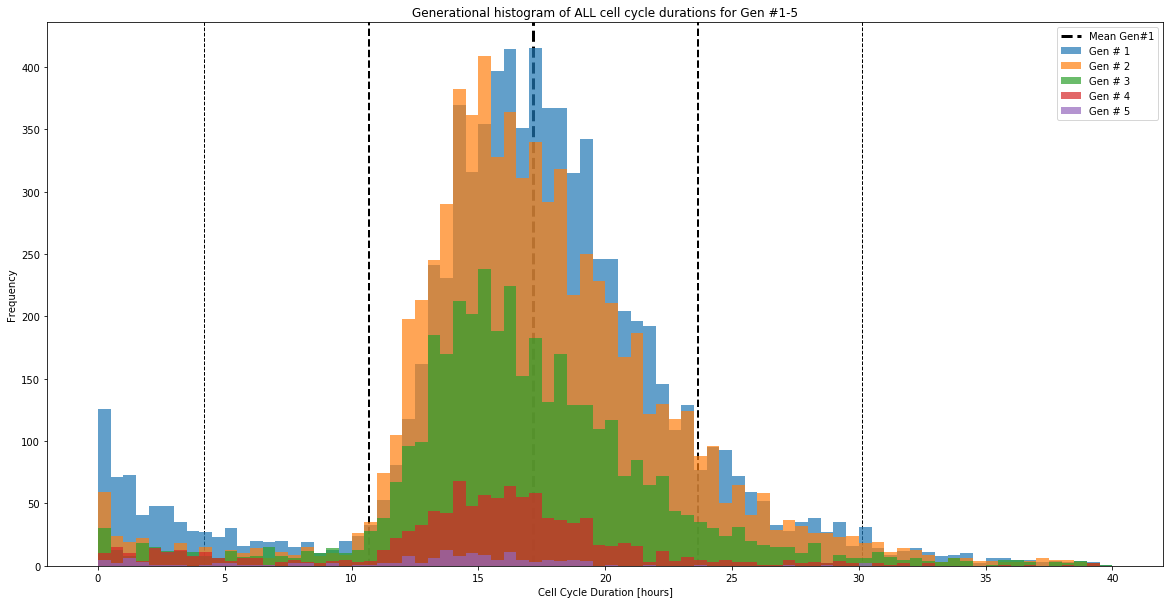

In [4]:
_ = plt.figure(figsize=(20, 10))
for enum, generation in enumerate(cct):
    plt.hist(generation, bins=80, range=(0, 40), alpha=0.7, label="Gen # {}".format(enum+1))
plt.title("Generational histogram of ALL cell cycle durations for Gen #1-5")
plt.axvline(x=mean, linestyle='dashed', linewidth=3, color="black", zorder=0, label="Mean Gen#1")
plt.axvline(x=mean-std, linestyle='dashed', linewidth=2, color="black", zorder=0)
plt.axvline(x=mean+std, linestyle='dashed', linewidth=2, color="black", zorder=0)
plt.axvline(x=mean-2*std, linestyle='dashed', linewidth=1, color="black", zorder=0)
plt.axvline(x=mean+2*std, linestyle='dashed', linewidth=1, color="black", zorder=0)

plt.xlabel("Cell Cycle Duration [hours]")
plt.ylabel("Frequency")
plt.legend(loc="best")
plt.show()
plt.close()

Plot the individual 2D histograms ONLY for cells in the range(8, 40):

In [5]:
cct_ranged = [[] for _ in range(5)]

for enum, generation in enumerate(cct):
    for item in generation:
        if item >= 8.0 and item <= 32:
            cct_ranged[enum].append(item)
            

Print some statistics of your RANGED cell cycle times: 

In [6]:
mean_new, std_new = 0, 0

for enum, generation in enumerate(cct_ranged):
    print ("Cells in Gen#{}\t-> {}\t\tMean = {}\tSt.Dev = {}" \
            .format(enum+1, len(generation), np.mean(generation), np.std(generation)))
    if enum == 0:
        mean_new = np.mean(generation)
        std_new = np.std(generation)


Cells in Gen#1	-> 7209		Mean = 18.0139177833264	St.Dev = 4.071227710139404
Cells in Gen#2	-> 6745		Mean = 17.65363965900667	St.Dev = 4.180528362870914
Cells in Gen#3	-> 3568		Mean = 17.157418189461882	St.Dev = 3.994633490433063
Cells in Gen#4	-> 891		Mean = 16.548074074074076	St.Dev = 3.6802757315592918
Cells in Gen#5	-> 115		Mean = 15.54666695652174	St.Dev = 3.684999370437602


Plot the individual 2D histograms for ALL cells in the files - even outliers:

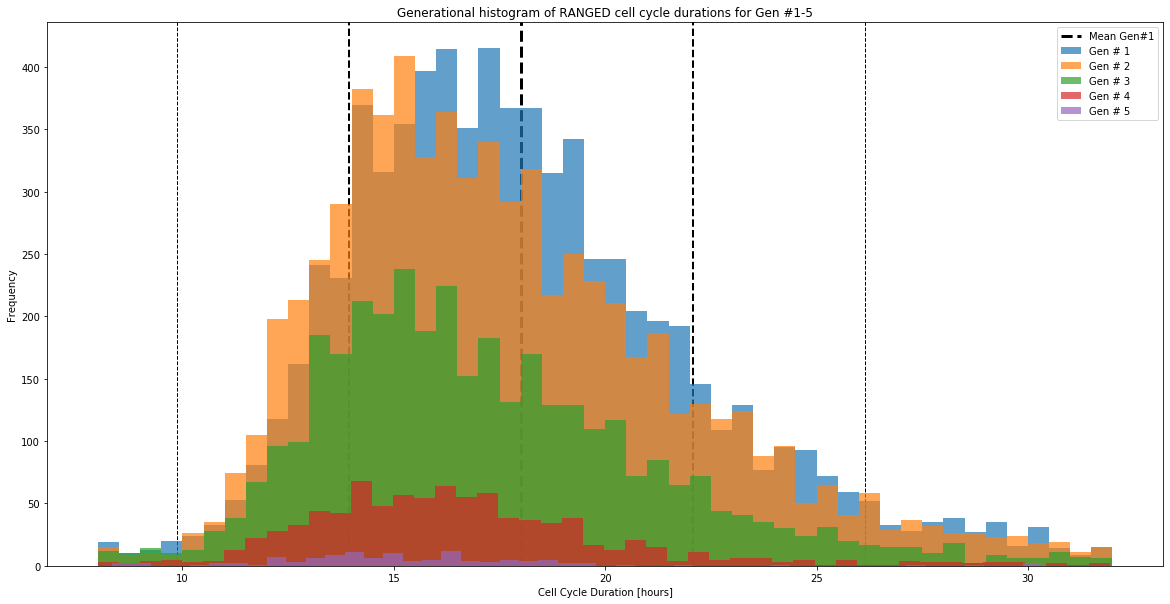

In [7]:
_ = plt.figure(figsize=(20, 10))
for enum, generation in enumerate(cct_ranged):
    plt.hist(generation, bins=48, alpha=0.7, label="Gen # {}".format(enum+1))
plt.title("Generational histogram of RANGED cell cycle durations for Gen #1-5")
plt.axvline(x=mean_new, linestyle='dashed', linewidth=3, color="black", zorder=0, label="Mean Gen#1")
plt.axvline(x=mean_new-std_new, linestyle='dashed', linewidth=2, color="black", zorder=0)
plt.axvline(x=mean_new+std_new, linestyle='dashed', linewidth=2, color="black", zorder=0)
plt.axvline(x=mean_new-2*std_new, linestyle='dashed', linewidth=1, color="black", zorder=0)
plt.axvline(x=mean_new+2*std_new, linestyle='dashed', linewidth=1, color="black", zorder=0)

plt.xlabel("Cell Cycle Duration [hours]")
plt.ylabel("Frequency")
plt.legend(loc="best")
plt.show()
plt.close()

From these ranged cells, have a look at the fast / slow dividers and elaborate their children's timings:

7209
947


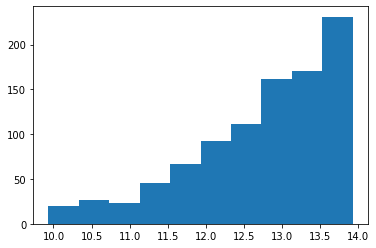

In [8]:
fast = [item for item in cct_ranged[0] if item >= mean_new - 2*std_new and item <= mean_new - 1*std_new]

print (len(cct_ranged[0]))
print (len(fast))

plt.hist(fast, bins=10, alpha=1, label="Fast dividers")
plt.show()
plt.close()

Now go back to the raw files and have a look at whether you can extract all gen#2 of these cells:

In [9]:
def Fast_Dividers_CCT_Heritability(lower_limit, upper_limit, generation=1):
    """ """
    
    if lower_limit >= upper_limit:
        raise ValueError("Lower / upper limit values are incorrect!")
    
    parent_list = []
    child_list = []

    for movie in Get_MDCK_Movies_Paths():
        hdf5_file = movie + "/HDF/segmented.hdf5"
        print ("Processing file: {}".format(hdf5_file))

        with h5py.File(hdf5_file, 'r') as f:

            labels = []
            for cell in f["tracks"]["obj_type_1"]["LBEPR"]:
                labels.append(int(cell[0]))
                
            for cell in f["tracks"]["obj_type_1"]["Ch_Ch_Gen_CCT"]:
                if int(cell[2]) == generation:
                    if lower_limit <= float(cell[3]) <= upper_limit:
                        children = [int(cell[0]), int(cell[1])]
                        if not 0 in children: 
                            for child in children:
                                idx = labels.index(child)
                                child_cct = f["tracks"]["obj_type_1"]["Ch_Ch_Gen_CCT"][idx][3]
                                parent_list.append(float(cell[3]))
                                child_list.append(float(child_cct))

    return parent_list, child_list


In [10]:
criteria = ["fast", "slow", "left", "right", "normal"]
lower_limits = [mean_new - 2*std_new, mean_new + 1*std_new, mean_new - 1*std_new, mean_new, mean_new - 1*std_new]
upper_limits = [mean_new - 1*std_new, mean_new + 2*std_new, mean_new, mean_new + 1*std_new, mean_new + 1*std_new]

parents = [[] for _ in range(len(criteria))]
children = [[] for _ in range(len(criteria))]

for number, (lower, upper) in enumerate(zip(lower_limits, upper_limits)):
    parent, child = Fast_Dividers_CCT_Heritability(lower_limit=lower, upper_limit=upper, generation=1)
    parents[number] = parent
    children[number] = child
    print ("Cells = {}\nParent == Child: {}\n\tParent -> Len = {}; Min = {}; Max = {}\n\tChild -> Len = {}; Min = {}; Max = {}".format(criteria[number], len(parent)==len(child), len(parent), min(parent), max(parent), len(child), min(child), max(child)))


Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0124/pos7//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0124/pos8//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0124/pos9//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos0//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos10//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos2//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos4//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos6//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos8//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos0//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos11//HDF/segmented.hd

Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0124/pos8//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0124/pos9//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos0//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos10//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos2//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos4//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos6//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos8//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos0//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos11//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos13//HDF/segmented.h

Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0124/pos8//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0124/pos9//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos0//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos10//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos2//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos4//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos6//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0327/pos8//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos0//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos11//HDF/segmented.hdf5
Processing file: /Volumes/lowegrp/Data/Kristina/Cells_MDCK/AB0724/pos13//HDF/segmented.h

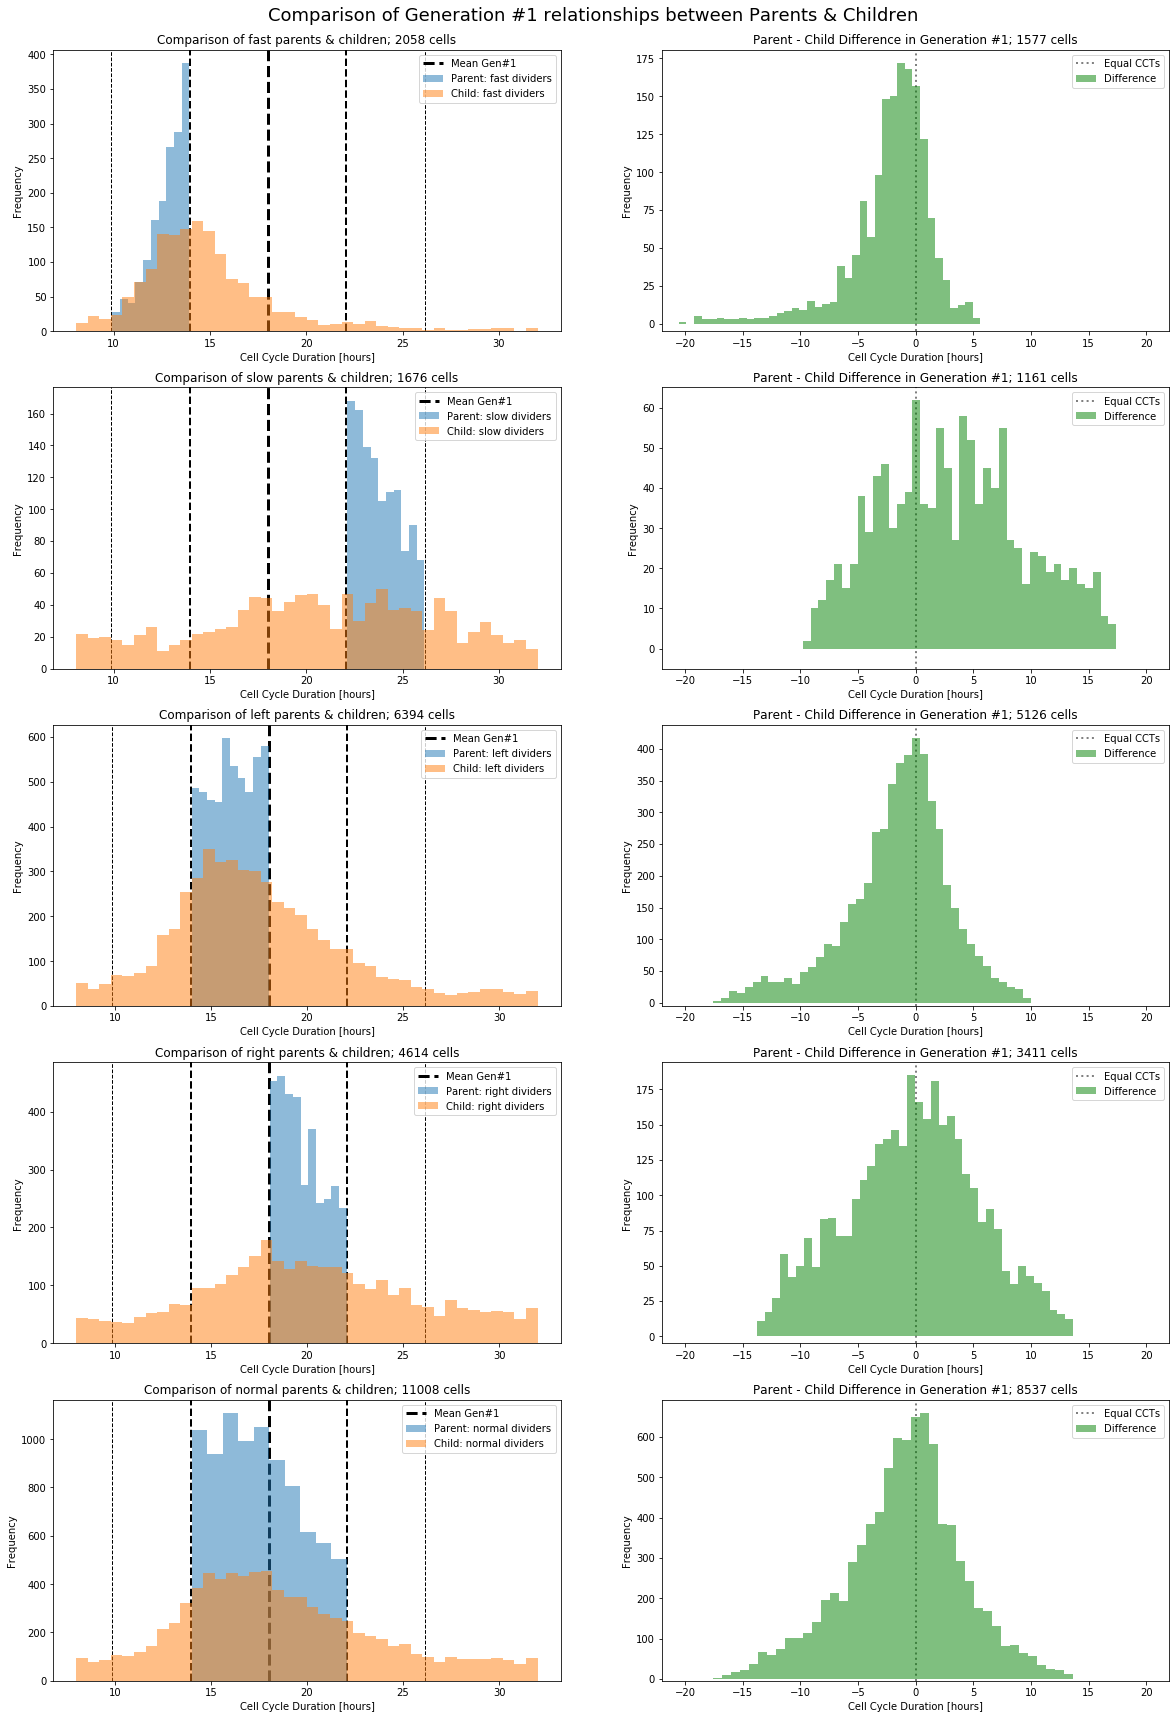

In [11]:
range = (8, 32)
fig, axs = plt.subplots(figsize=(20, 30), nrows=5, ncols=2)
fig.suptitle(t="Comparison of Generation #1 relationships between Parents & Children", x=0.5, y=0.9, fontsize=18)

for enum, (parent, child) in enumerate(zip(parents, children)):
    #print (len(parent), len(child), len(parent) == len(child))
    
    parent_new = []
    child_new = []
    for p, ch in zip(parent, child):
        if range[0] <= ch <= range[1]:
            parent_new.append(p)
            child_new.append(ch)
    
    axs[enum, 0].hist(parent_new, bins=10, alpha=0.5, label="Parent: {} dividers".format(criteria[enum]))
    axs[enum, 0].hist(child_new, bins=40, alpha=0.5, label="Child: {} dividers".format(criteria[enum]))
    
    axs[enum, 0].axvline(x=mean_new, linestyle='dashed', linewidth=3, color="black", zorder=0, label="Mean Gen#1")
    axs[enum, 0].axvline(x=mean_new-1*std_new, linestyle='dashed', linewidth=2, color="black", zorder=0)
    axs[enum, 0].axvline(x=mean_new+1*std_new, linestyle='dashed', linewidth=2, color="black", zorder=0)
    axs[enum, 0].axvline(x=mean_new-2*std_new, linestyle='dashed', linewidth=1, color="black", zorder=0)
    axs[enum, 0].axvline(x=mean_new+2*std_new, linestyle='dashed', linewidth=1, color="black", zorder=0)

    axs[enum, 0].set_title("Comparison of {} parents & children; {} cells".format(criteria[enum], len(parent)))
    axs[enum, 0].set_xlabel("Cell Cycle Duration [hours]")
    axs[enum, 0].set_ylabel("Frequency")
    axs[enum, 0].legend()
    
    # Subtract the items
    difference = [item_1-item_2 for item_1, item_2 in zip(parent_new, child_new)]
    #print (min(difference), max(difference))
    
    axs[enum, 1].hist(difference, bins=40, color="green", alpha=0.5, label="Difference".format(criteria[enum]))
    axs[enum, 1].axvline(x=0, linestyle='dotted', linewidth=2, color="grey", zorder=0, label="Equal CCTs")
    
    axs[enum, 1].set_title("Parent - Child Difference in Generation #1; {} cells".format(len(difference)))
    axs[enum, 1].set_xlabel("Cell Cycle Duration [hours]")
    axs[enum, 1].set_ylabel("Frequency")
    axs[enum, 1].set_ylim(-5)
    axs[enum, 1].set_xlim(-22, 22)
    axs[enum, 1].legend()

plt.show()
plt.close()
